# PCA


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/ACP/wisconsinBreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Borrar la columna innecesaria
df.drop(columns='Unnamed: 32', inplace=True)
# Binarizar la columna de destino
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# guardar datos en X
X = df.drop(columns='diagnosis')
# Codificar nuestro objetivo
y = df['diagnosis']

In [4]:
# llamamos al escalador estandar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X)

In [5]:
pca = PCA()
pca.fit(scaled_df)

PCA()

Podemos usar cualquier número de Componentes Principales para nuestro modelo. Para determinar cuántos ocupar, es común mirar en Scree Plot. Este es solo un trazo de la proporción de varianza que cada componente principal define.

Text(0, 0.5, 'Proportion of Explained Variance')

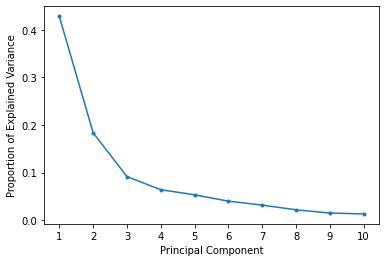

In [6]:
# Graficar los ratios de varianza explicadas de los primeros 10 componentes principales
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

Lo que buscamos en el trazo anterior es el “codo” o el punto de inflexión. ¿En qué punto el continuar agregando componentes principales solo añade un aumento marginal a la proporción de la varianza explicada? 

Basándonos en el gráfico anterior, ¿cuántos componentes principales deberíamos mantener?

Usemos ahora los componentes principales para crear un modelo de regresión logística para predecir las células malignas.

In [7]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [8]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [9]:
# Ajustar PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
# ajustar regresión logística
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

LogisticRegression()

In [10]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.960093896713615
Testing accuracy: 0.9440559440559441
